# AMMA Testing

**Converting Pianorolls to MIDI Files**

*by Matthew Avallone, Anish Malhotra*

# Imports

In [0]:
import numpy as np
import pretty_midi

In [0]:
!pip install pypianoroll

  Stored in directory: /root/.cache/pip/wheels/ed/f6/fb/5d070524ecf7ba9ed201247a293c01945cfd7f840f8ef338c0
Successfully built pypianoroll


In [0]:
import pypianoroll

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2768896/45929032 bytes (6.0%)6676480/45929032 bytes (14.5%)10584064/45929032 bytes (23.0%)14508032/45929032 bytes (31.6%)18399232/45929032 bytes (40.1%)22331392/45929032 bytes (48.6%)26378240/45929032 bytes (57.4%)30187520/45929032 bytes (65.7%)34119680/45929032 bytes (74.3%)38019072/45929032 bytes (82.8%)41844736/45929032 bytes (91.1%)45842432/45929032 bytes (99.8%)

In [0]:
num_classes = 7
note_shift = 24
num_of_notes = 84

In [0]:
! wget https://drive.google.com/open?id=1OsOU83Dq8b4Nwyy6UP9BPGSfFzRs0cBt

--2019-04-24 01:50:48--  https://drive.google.com/open?id=1OsOU83Dq8b4Nwyy6UP9BPGSfFzRs0cBt
Resolving drive.google.com (drive.google.com)... 74.125.142.139, 74.125.142.101, 74.125.142.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/open?id%3D1OsOU83Dq8b4Nwyy6UP9BPGSfFzRs0cBt&followup=https://drive.google.com/open?id%3D1OsOU83Dq8b4Nwyy6UP9BPGSfFzRs0cBt [following]
--2019-04-24 01:50:48--  https://accounts.google.com/ServiceLogin?service=wise&passive=1209600&continue=https://drive.google.com/open?id%3D1OsOU83Dq8b4Nwyy6UP9BPGSfFzRs0cBt&followup=https://drive.google.com/open?id%3D1OsOU83Dq8b4Nwyy6UP9BPGSfFzRs0cBt
Resolving accounts.google.com (accounts.google.com)... 74.125.28.84, 2607:f8b0:400e:c07::54
Connecting to accounts.google.com (accounts.google.com)|74.125.28.84|:443... conne

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from google.colab import drive
from oauth2client.client import GoogleCredentials

    100% |████████████████████████████████| 993kB 21.7MB/s 


In [0]:
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Set Instrument Class

In [0]:
CLASS = 'Percussion'

In [0]:
import os

output_folder = '/content/gdrive/My Drive/Senior Design Project/Results/' + CLASS + '/'
os.chdir(output_folder)

# Converting Output to MIDI Format

##Formatting the Output into Pianorolls

Load the output Numpy Arrays

In [0]:
X = np.load(output_folder + 'Xts_' + CLASS.lower() + '.npy')
y = np.load(output_folder + 'ypred_' + CLASS.lower() + '.npy')
yorig = np.load(output_folder + 'yts_' + CLASS.lower() + '.npy')

Making sure notes are positive

In [0]:
for i in range(0, len(y)):
    y[i] = np.absolute(y[i])
    
# Artificially Adding Breaks in Notes
#     if i == 0:
#         for j in range(0, len(y[i])):
#             if(j == 384 or j == 768 or j == 1152):
#                 y[i][j] = 0

In [0]:
#for tick in y[0]:    
    #print(tick)

Reconstructing Pianoroll Shape (num_ticks x 128)

In [0]:
# This is just for all pianorolls

index = 35

num_ticks = len(y[0])

beginning_pad = np.zeros((num_ticks, note_shift)) # adding zeros to beginning notes
ending_pad = np.zeros((num_ticks, 128-num_of_notes-note_shift)) # adding zeros to ending notes

output_pianorolls = []
input_melodies = []
orig_pianorolls = []

for i in range(len(y)):
    output_pianoroll = np.hstack((beginning_pad, y[i]))
    output_pianoroll = np.hstack((output_pianoroll, ending_pad))

    input_melody = np.hstack((beginning_pad, X[i]))
    input_melody = np.hstack((input_melody, ending_pad))

    orig_pianoroll = np.hstack((beginning_pad, yorig[i]))
    orig_pianoroll = np.hstack((orig_pianoroll, ending_pad))
    
    output_pianorolls.append(output_pianoroll)
    input_melodies.append(input_melody)
    orig_pianorolls.append(orig_pianoroll)

## Creating the Multitrack File

In [0]:
from pypianoroll import Track, Multitrack
from matplotlib import pyplot as plt

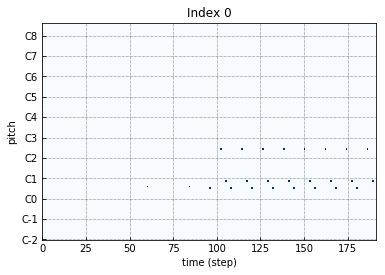

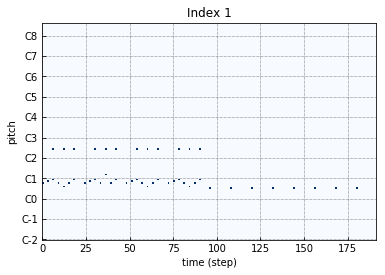

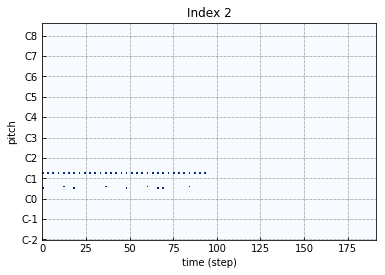

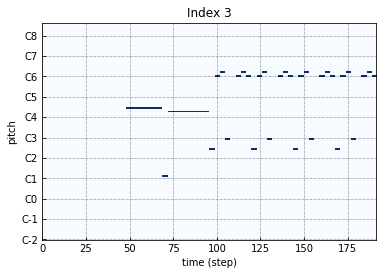

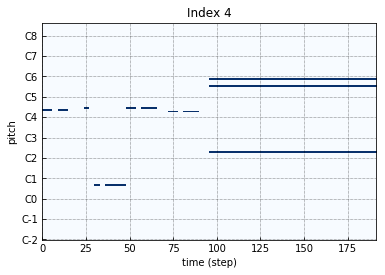

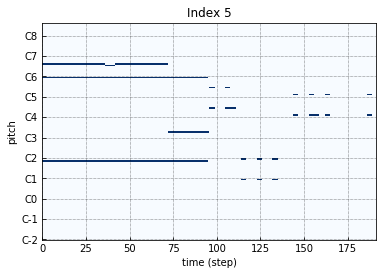

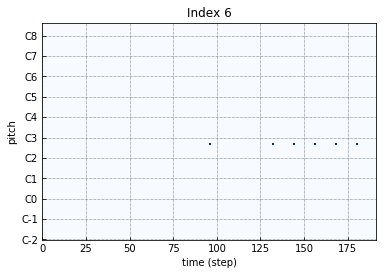

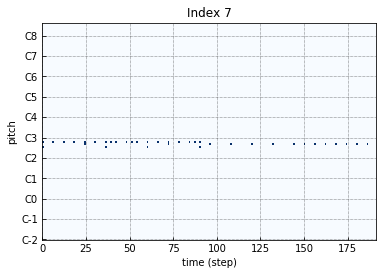

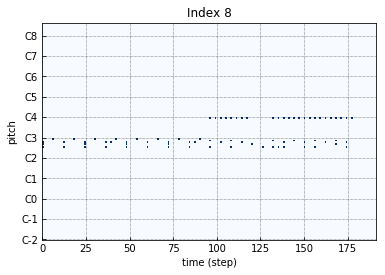

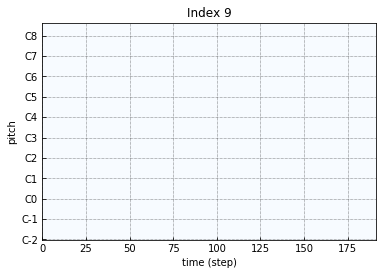

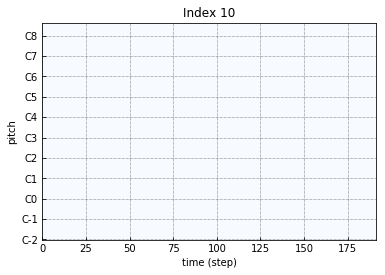

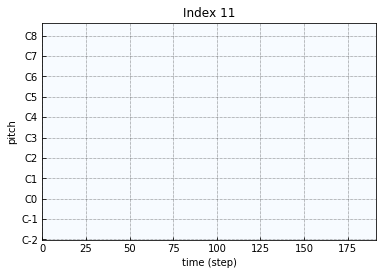

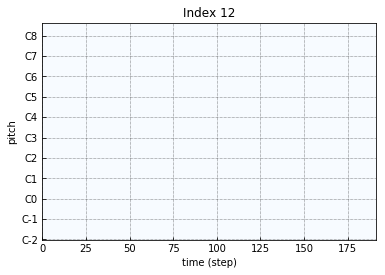

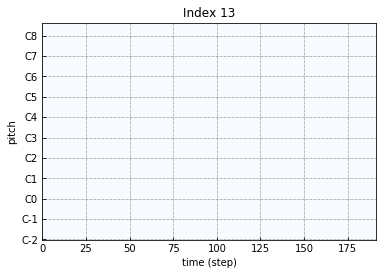

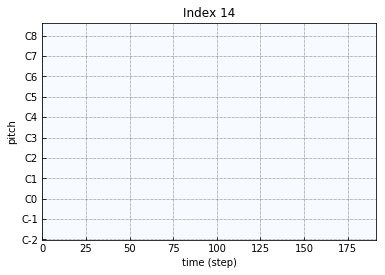

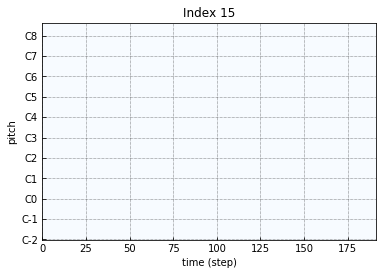

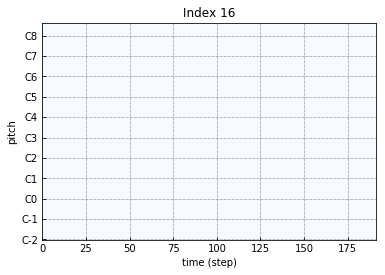

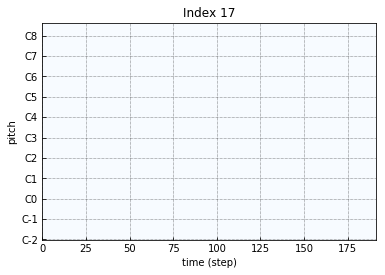

In [0]:
pred_accompaniments = []
#binarize_threshold_wind = 0.1
binarize_threshold = 0.0001

for i in range(0,len(y)):
    first_accompaniment = Track(pianoroll=output_pianorolls[i], program=71, is_drum=False,name='first accompaniment')
    first_accompaniment.binarize(threshold=binarize_threshold) # format into 1 and 0
    
    # Plot the piano-roll
    fig, ax = first_accompaniment.plot()
    ax.set_title('Index ' + str(i))
    plt.show()
    
    # Add to predicted accompaniments
    pred_accompaniments.append(first_accompaniment)

## Updating threshold for a specific index

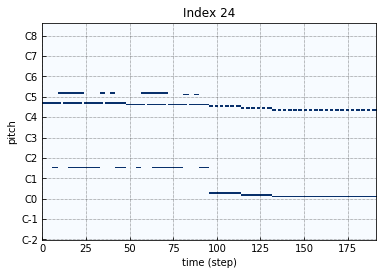

In [0]:
# USE THIS TO MODIFY THE THRESHOLD FOR A SPECIFIC INDEX

## This updates the value of binarize_threshold for the filename. If you choose 
## a different index to write to file, the filename will include the updated value

change_index = 0
binarize_threshold = 0.9

first_accompaniment = Track(pianoroll=output_pianorolls[change_index], program=71, is_drum=False,name='first accompaniment')
first_accompaniment.binarize(threshold=binarize_threshold) # format into 1 and 0

# Plot the piano-roll
fig, ax = first_accompaniment.plot()
ax.set_title('Index ' + str(i))
plt.show()

# Add to predicted accompaniments
pred_accompaniments[change_index]=first_accompaniment

## Adding original accompaniments and melodies

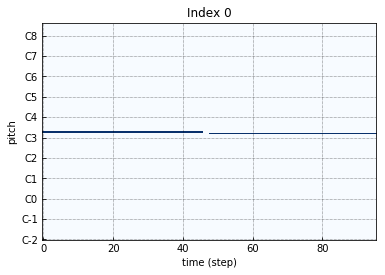

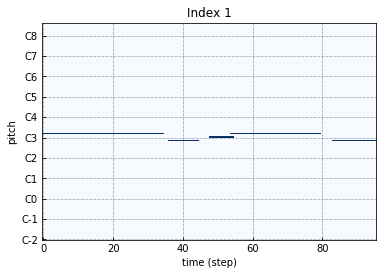

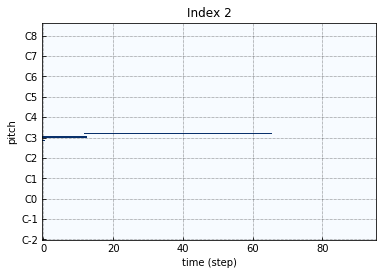

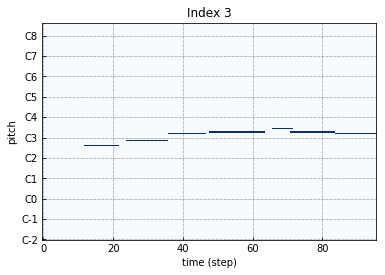

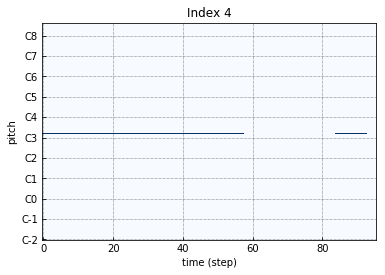

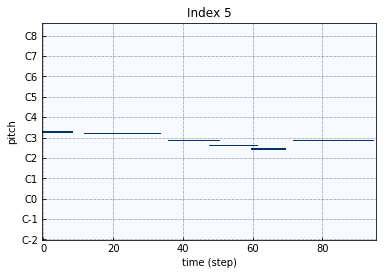

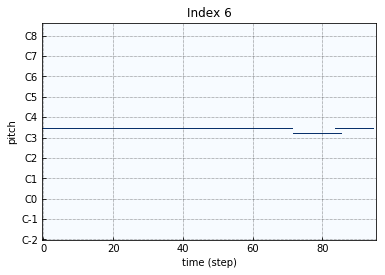

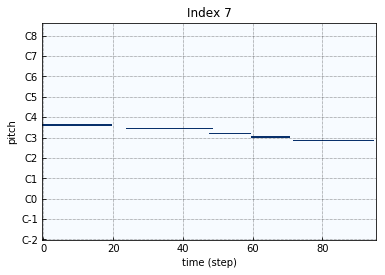

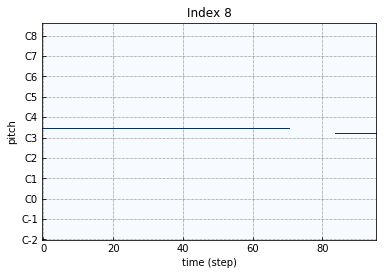

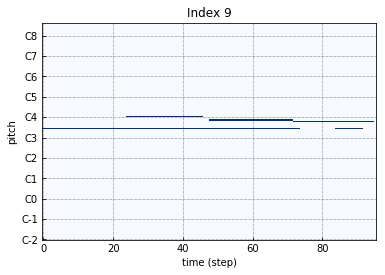

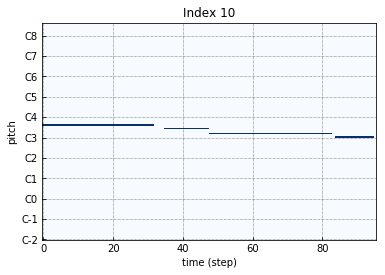

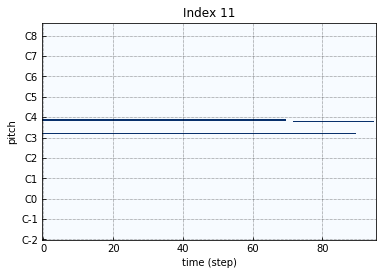

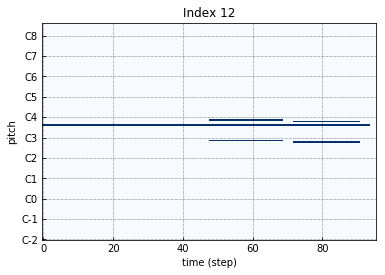

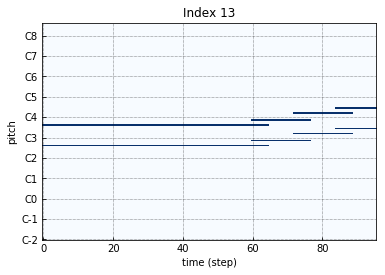

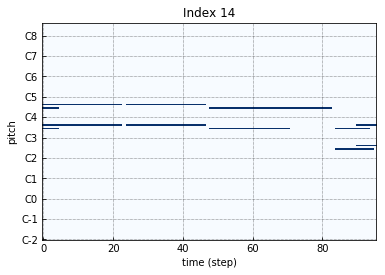

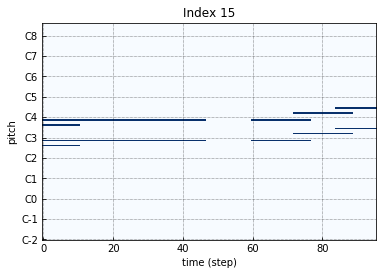

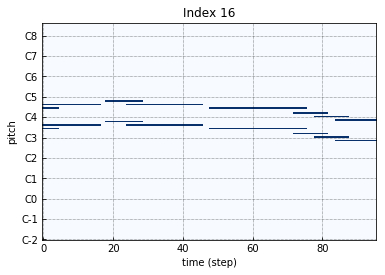

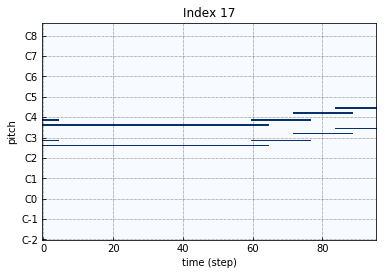

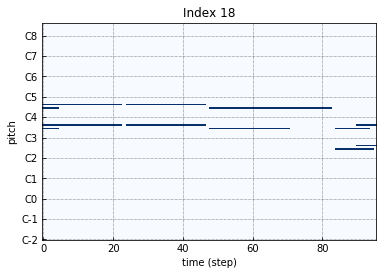

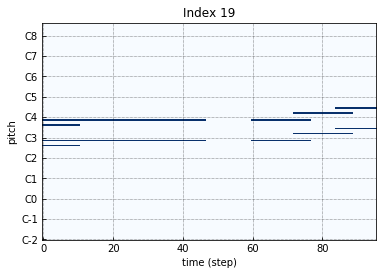

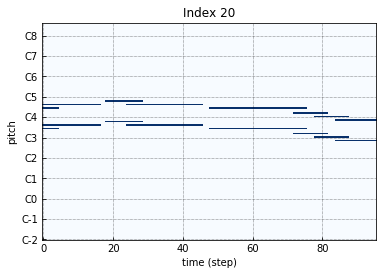

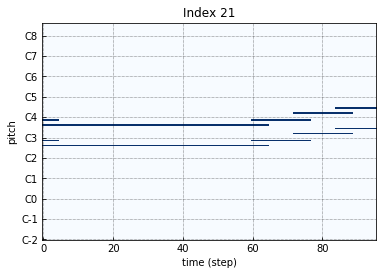

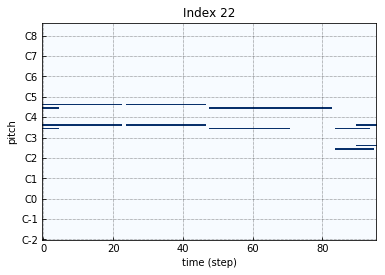

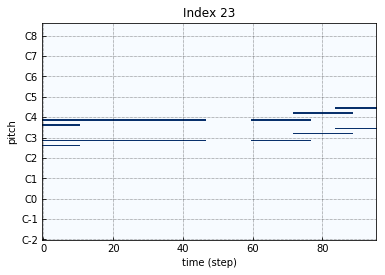

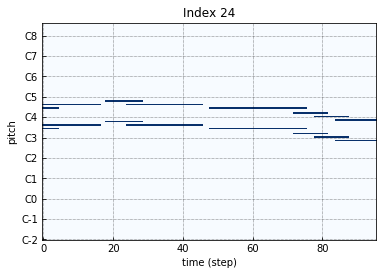

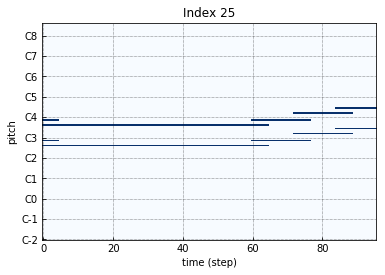

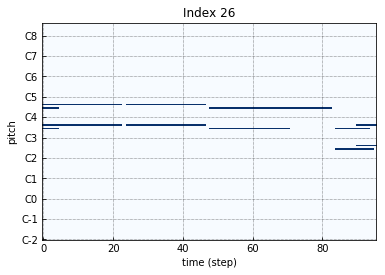

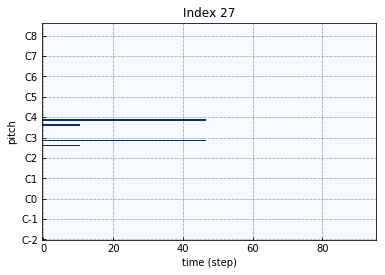

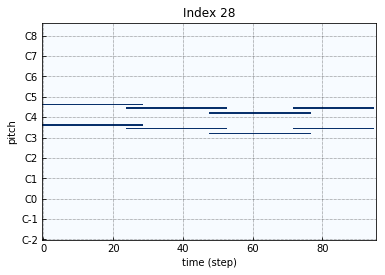

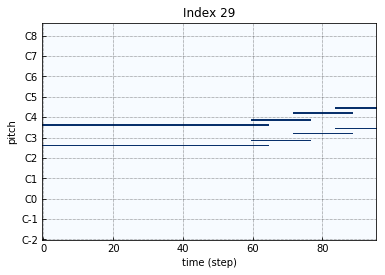

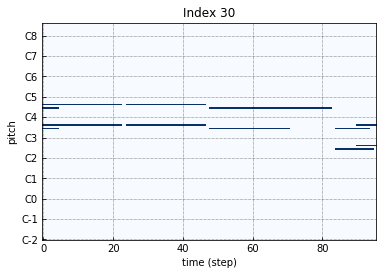

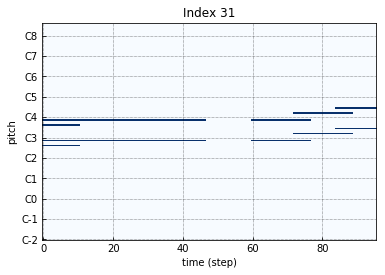

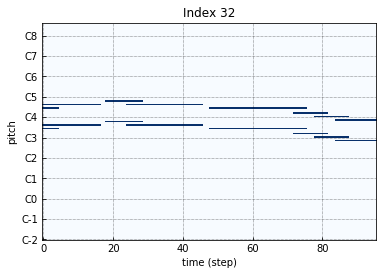

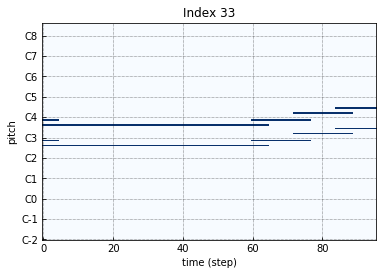

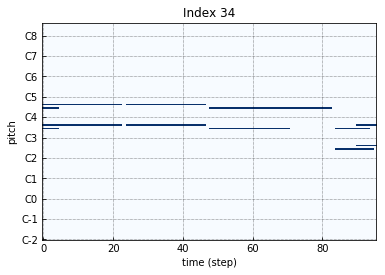

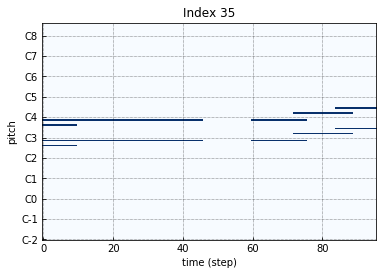

In [0]:
orig_accompaniments = []

for i in range(0,len(y)):
    orig_accompaniment = Track(pianoroll=orig_pianorolls[i], program=71, is_drum=False,name='orig accompaniment')
    
    # Plot the piano-roll
    fig, ax = orig_accompaniment.plot()
    ax.set_title('Index ' + str(i))
    plt.show()
    
    # Add to predicted accompaniments
    orig_accompaniments.append(orig_accompaniment)

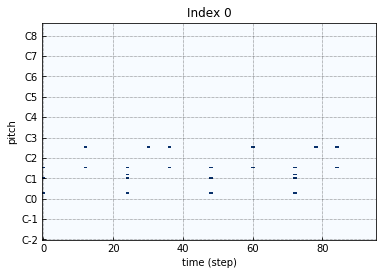

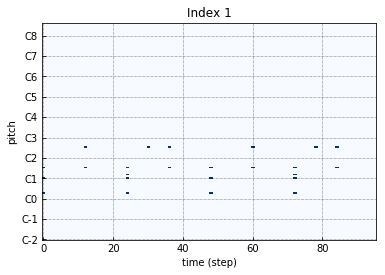

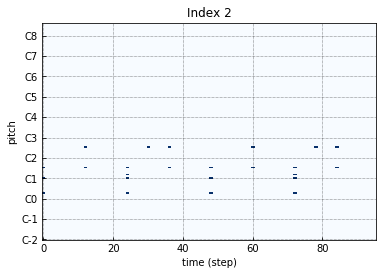

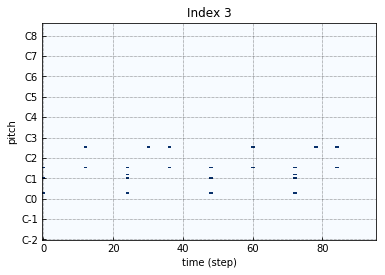

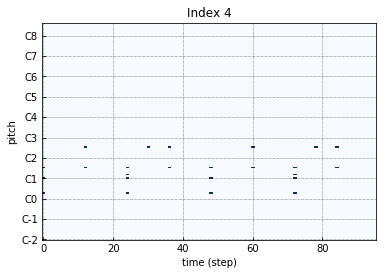

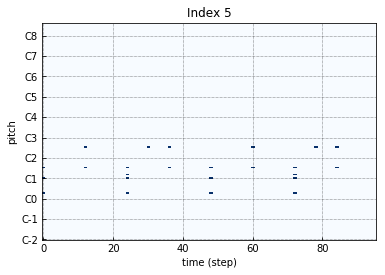

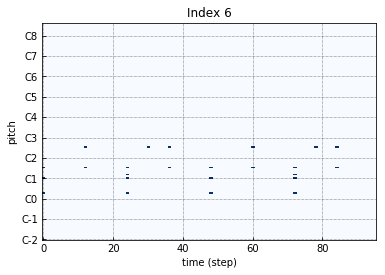

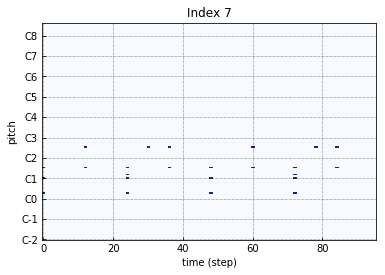

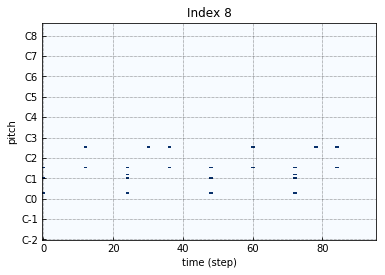

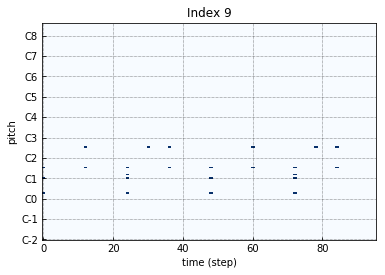

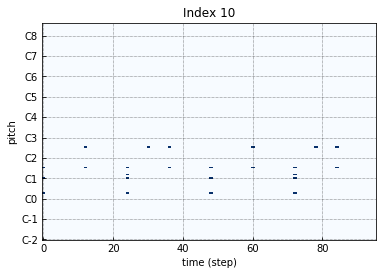

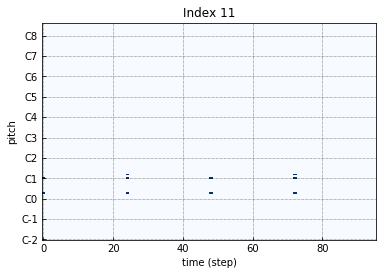

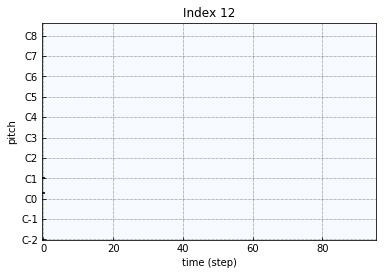

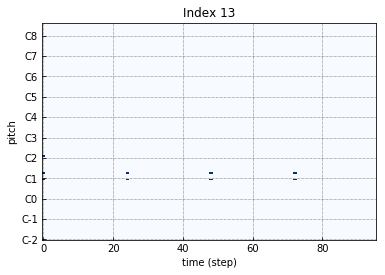

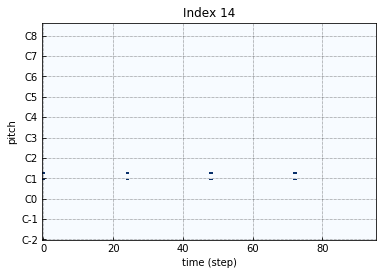

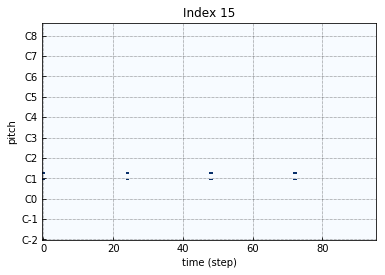

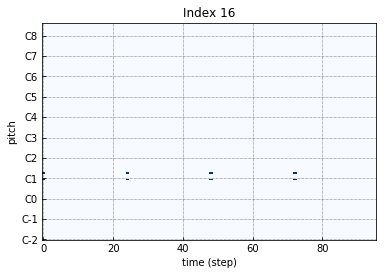

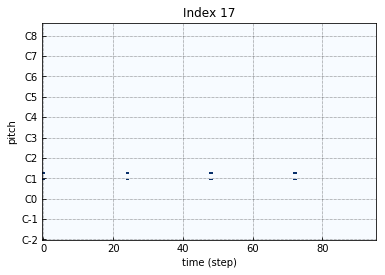

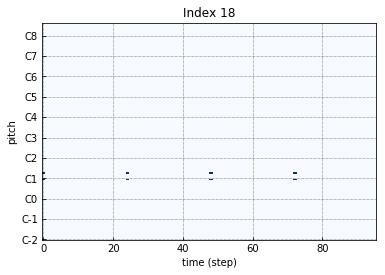

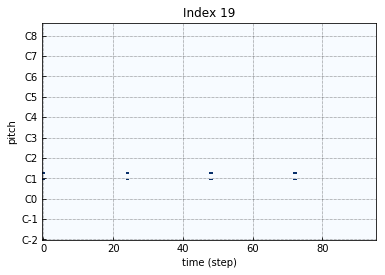

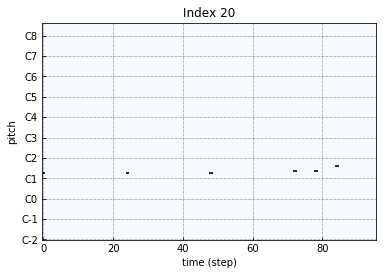

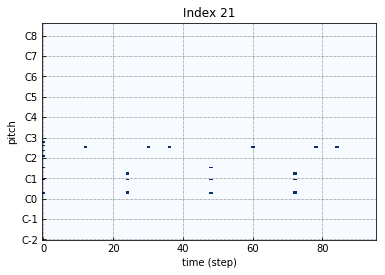

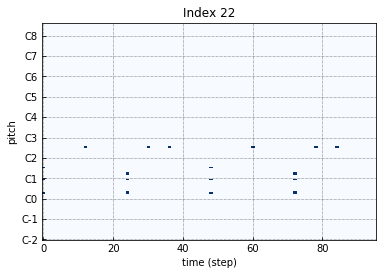

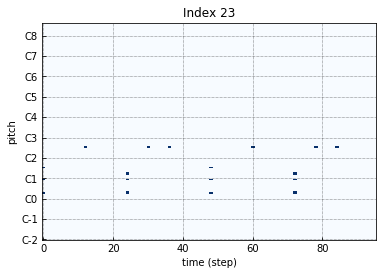

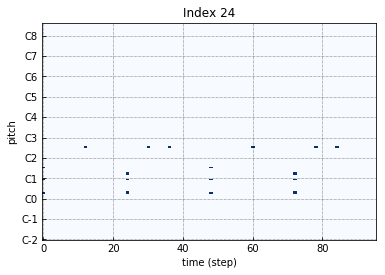

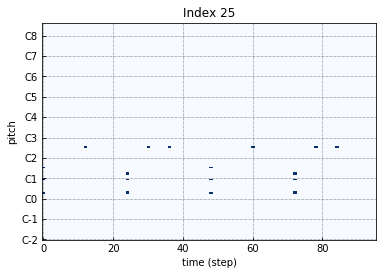

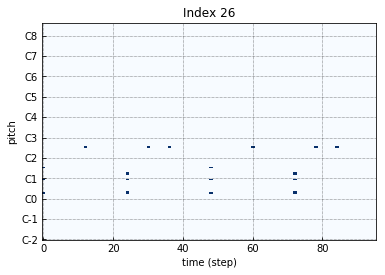

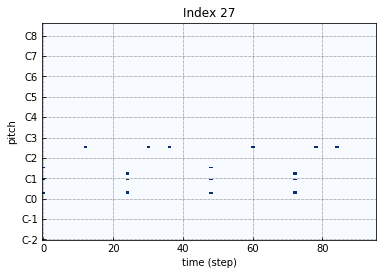

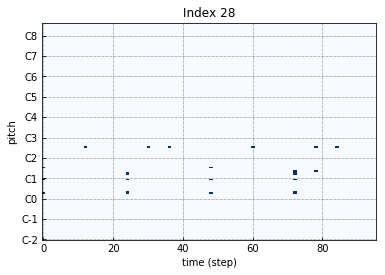

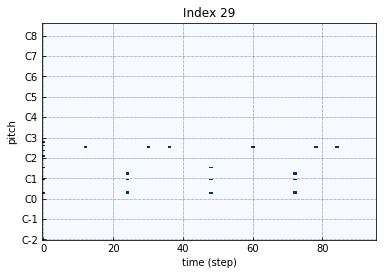

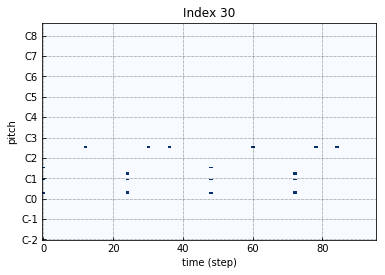

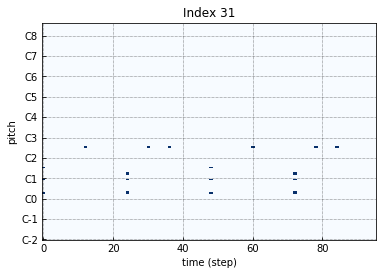

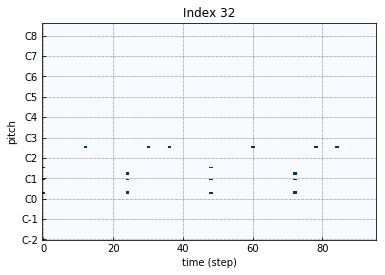

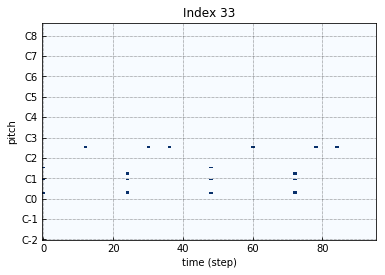

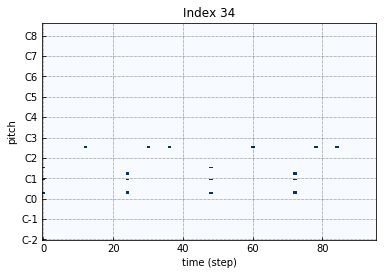

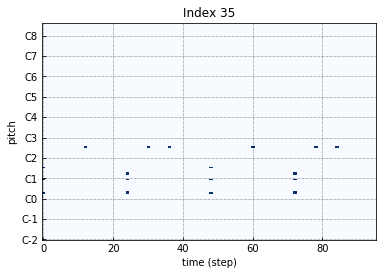

In [0]:
melodies = []

for i in range(0,len(y)):
    melody = Track(pianoroll=input_melodies[i], program=0, is_drum=False,name='input melody')
    
    # Plot the piano-roll
    fig, ax = melody.plot()
    ax.set_title('Index ' + str(i))
    plt.show()
    
    # Add to predicted accompaniments
    melodies.append(melody)

In [0]:
downbeats = np.zeros(num_ticks, dtype=bool)
downbeats[0] = True
# downbeats[384] = True
#downbeats[768] = True
#downbeats[1152] = True

In [0]:
index = 5

In [0]:
song = Multitrack(tracks=[melodies[index]], beat_resolution=24, downbeat=downbeats, name='first_song')
song.append_track(pred_accompaniments[index])
song.append_track(orig_accompaniments[index])

## **Saving the Multitrack As MIDI**

In [0]:
import time

In [0]:
output_dir = '/content/gdrive/My Drive/Senior Design Project/MIDI Output Data/' + CLASS + '/'
timestr = time.strftime("%Y%m%d-%H%M%S")

os.chdir(output_dir)

pypianoroll.write(song, output_dir + 'output-' + str(index) + '-' + str(binarize_threshold) + '-' + CLASS.lower() + '-' + timestr + '.mid')